# **Fake News Detection**

In [47]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Fake News Detection.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Fake News Detection.ipynb to pdf
[NbConvertApp] Support files will be in Fake News Detection_files/
[NbConvertApp] Making directory ./Fake News Detection_files
[NbConvertApp] Making directory ./Fake News Detection_files
[NbConvertApp] Making directory ./Fake News Detection_files
[NbConvertApp] Writing 66250 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 139852 bytes to /content/drive/My Drive/Fake News Detection.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'

In [8]:
 #Dependencies
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Reading Fake and True Dataset
fake = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake News Detection/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake News Detection/True.csv')

In [10]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## **Pre-Processing**

In [12]:
#Priting Null/Missing values if exist in True data
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [13]:
#Priting Null/Missing values if exist in Fake data
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [14]:
#Printing Unique Subject in True Data
true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

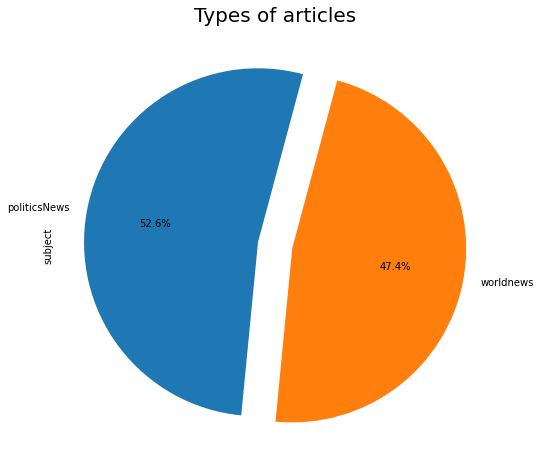

In [15]:
#Pie Chart of Unique Subject
true['subject'].value_counts().plot.pie(figsize = (8,8), startangle = 75,explode=[0.1,0.1],autopct='%1.1f%%')
plt.title('Types of articles', fontsize = 20)
plt.axis('on')
plt.show()

In [16]:
#Printing Unique Subject in False Data
fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

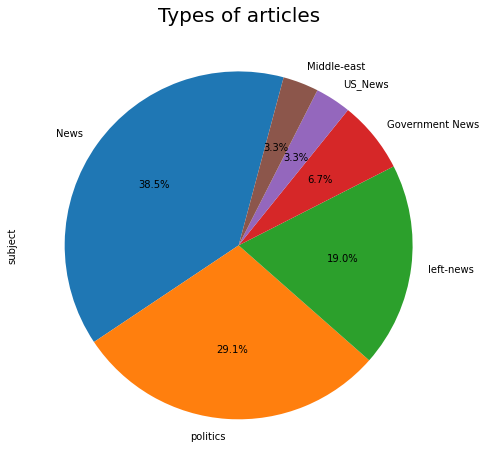

In [17]:
#Pie Chart of Unique Subject
fake['subject'].value_counts().plot.pie(figsize = (8,8),startangle = 75,autopct='%1.1f%%')
plt.title('Types of articles', fontsize = 20)
plt.axis('on')
plt.show()

**Labelling and Merging Fake and True Data**

In [18]:
#Labelling data by adding the target column
# 1 representing Fake and 0 representing True
fake["target"] = 1
true["target"] = 0

In [19]:
#True and Fake data is merged
df = pd.concat([true, fake], axis=0)
df = df.sample(frac=1.0, random_state=0)
df.index = [i for i in range(df.shape[0])]

In [20]:
df

,title,text,subject,date,target
0,RUBIO Sides With Democrats On Giving A Whoppin...,Democrats want to spend a whopping $2 billion ...,politics,"May 16, 2016",1
1,Ted Cruz Says Endorsing Trump Is A ‘Grave Mis...,Republican presidential candidate and Texas Se...,News,"March 1, 2016",1
2,"‘Responsible Gun Owner’ Road Rages, Threatens...",The National Rifle Association tells us that a...,News,"February 2, 2016",1
3,TEACHER’S UNION PROTEST Gets Ugly As Protester...,"In case you don t live in the Midwest, you mig...",Government News,"Jan 20, 2016",1
4,Etihad advises checks with U.S. missions after...,DUBAI (Reuters) - Etihad Airways is advising s...,politicsNews,"March 7, 2017",0
...,...,...,...,...,...
44893,Paul Krugman: Obama Rolled Back RONALD REAGAN...,"Paul Krugman, by his own admission, has been d...",News,"January 4, 2016",1
44894,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017",0
44895,OOPS! NASA Makes Shocking Claim: Burning Fossi...,UNDER MY PLAN ELECTRICITY RATES WOULD NECES...,left-news,"Dec 23, 2015",1
44896,Collapsing: Why the ‘Russia Hack’ Witch Hunt W...,21st Century Wire says Washington s Russian wi...,US_News,"March 25, 2017",1


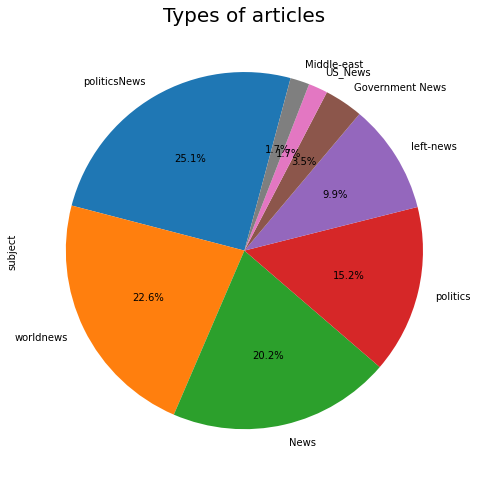

In [21]:
#Pie chart of merged labelled data (True and False)
df['subject'].value_counts().plot.pie(figsize = (8,10),startangle = 75, autopct='%1.1f%%')
plt.title('Types of articles', fontsize = 20)
plt.axis('on')
plt.show()

In [22]:
#Combining Text and Title together
df["text"] = df["text"]+" "+df["title"]
df["text"]

0        Democrats want to spend a whopping $2 billion ...
1        Republican presidential candidate and Texas Se...
2        The National Rifle Association tells us that a...
3        In case you don t live in the Midwest, you mig...
4        DUBAI (Reuters) - Etihad Airways is advising s...
                               ...                        
44893    Paul Krugman, by his own admission, has been d...
44894    GUATEMALA CITY (Reuters) - Guatemala s top cou...
44895     UNDER MY PLAN   ELECTRICITY RATES WOULD NECES...
44896    21st Century Wire says Washington s Russian wi...
44897    WINNIPEG, Manitoba (Reuters) - Former U.S. Pre...
Name: text, Length: 44898, dtype: object

**Downloading stopwords**

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Data Cleaning**

In [25]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [26]:
df['text'] = df['text'].apply(stemming)

In [27]:
print(df['text'])

0        democrat want spend whop billion zika viru pre...
1        republican presidenti candid texa senat ted cr...
2        nation rifl associ tell us need ensur safeti g...
3        case live midwest might notic fight continu de...
4        dubai reuter etihad airway advis passeng check...
                               ...                        
44893    paul krugman admiss drool releas ir tax tabl s...
44894    guatemala citi reuter guatemala top court tues...
44895    plan electr rate would necessarili skyrocket s...
44896    st centuri wire say washington russian witch h...
44897    winnipeg manitoba reuter former u presid jimmi...
Name: text, Length: 44898, dtype: object


In [28]:
#Seprating label from data
X = df['text'].values
y = df['target'].values
X,y

(array(['democrat want spend whop billion zika viru prevent republican demand control rubio call stingi feder dollar guy realli republican two month run one conserv candid gop presidenti race sen marco rubio embrac democrat call open feder checkbook dole billion dollar money combat zika viru tack onto debt mr rubio whose home state florida risk seriou outbreak co sponsor legisl fulli fund presid obama nearli billion emerg spend request blast fellow republican stingi demand proof control mr rubio finish first term ditch senat end year said new spend offset fine also fine tack onto debt leav other pay time public health emerg like natur disast delay act figur tri agre go cut part budget said floor speech last week mr rubio give democrat polit cover congress prepar fight week mosquito born zika viru health expert say breakout u yet fear one loom summer heat hous gop releas plan monday would alloc million toward zika take money exist ebola money elsewher read wt rubio side democrat give wh

In [29]:
# converting the textual (string) data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)
print(X)

  (0, 89321)	0.4320185803455729
  (0, 88056)	0.03890078514170296
  (0, 87936)	0.022263647744827725
  (0, 86851)	0.0870112207941817
  (0, 86633)	0.020422600606075963
  (0, 85694)	0.04437010119898763
  (0, 85690)	0.16675032168806858
  (0, 85065)	0.05687798077795471
  (0, 84561)	0.027780921315325287
  (0, 83657)	0.3226038066046771
  (0, 80447)	0.026596914487362698
  (0, 79263)	0.031192519947980828
  (0, 78820)	0.042890978509864786
  (0, 77960)	0.023921579746118065
  (0, 76851)	0.039732183651303224
  (0, 75889)	0.026829749943700878
  (0, 75758)	0.17142498832020348
  (0, 74869)	0.0593444996599373
  (0, 74067)	0.23519899587651105
  (0, 73662)	0.02083942218934454
  (0, 73176)	0.058198551279550925
  (0, 73017)	0.13799114588571573
  (0, 72982)	0.04085798470814599
  (0, 71025)	0.04152974346921612
  (0, 69717)	0.047674336772530614
  :	:
  (44897, 11354)	0.033004341672479266
  (44897, 11232)	0.05027936208112444
  (44897, 11216)	0.0487011768034019
  (44897, 11213)	0.13382483032222492
  (44897, 1117

# **Train Test Split**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

# **Logistic Regression Model**

In [31]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

**Accuracy score of training data**

In [32]:
X_train_pred = model.predict(X_train)
train_acc = accuracy_score(X_train_pred, Y_train)
print('Train Accuracy: ', train_acc)

Train Accuracy:  0.9919817361768473


**Accuracy score of test data**

In [33]:
X_test_pred = model.predict(X_test)
test_acc = accuracy_score(X_test_pred, Y_test)
print('Test Accuracy: ', test_acc)

Test Accuracy:  0.9869710467706013


# **Model Prediction on Test data**

In [40]:
News_Testing = X_test[2]
prediction = model.predict(News_Testing)
prediction

array([1])

In [41]:
if (prediction[0]==0):
  print('This news is Real')
else: #(prediction[0]==1):
  print('Warning!!!, This news is Fake')

Warning!!!, This news is Fake
